In [104]:
def dfs(G, s):
    n = len(G)
    visited = [False]*n
    queued = [False]*n
    queued[s] = True
    q = [s]
    while len(q) > 0:
        j = 0
        temp = []
        u = q.pop()
        print("pos: ", u)
        if not visited[u]:
            visited[u] = True
            for v in reversed(G[u]):
                temp.append(v)
                print("v: ",v)
                print("vis: ",visited)
                if foundT(visited) == True and v == s:
                    q.append(v)
                    print("encontro")
                    break
                elif not queued[v]:
                    queued[v] = True
                    q.append(v)
                    break
            #for i in temp:
                #if visited[i] == True:
                    #j += 1
            #if j == len(temp):
                #print("no hay camino")
                #return
G = [[1,2,4,5],[0,3,4,5],[0,3,5],[1,2,4],[1,3],[1,2]]
dfs(G, 0)

In [141]:
#Imports
import random as rnd                 #Para usar numeros random 
import graphviz                      #Para usar graficar grafos
from random import shuffle as sh     #Para cambiar aleatoriamente orden de números
from graphviz import Digraph         #Para gráfica de grafos con flechas
from graphviz import Graph           #Para gráfica de grafos sin flechas

In [142]:
#Funcion para comprobar si todos los nodos fueron visitados
#(recibe una Lista)
#(devuelve True o False)

def foundT(L):
    n = len(L)
    for i in range(n):
        if L[i] == False:
            return False
    return True

In [143]:
#Funcion para encontrar la ruta que une a los nodos
#(recibe como parametros un Grafo y el punto de partida-llegada)
#(devuelve una lista de los nodos visitados)

def FoundWay(G, s):
    n = len(G)
    visited = [False]*n
    queued = [False]*n
    queued[s] = True
    q = [s]
    i = 1
    Rest = []
    while len(q) > 0:
        u = q.pop()
        print(u, "\t<--- paso ", i)
        Rest.append(u)
        i += 1
        if not visited[u]:
            visited[u] = True
            for v in reversed(G[u]):
                if foundT(visited) == True and v == s:
                    q.append(v)
                    break
                elif not queued[v]:
                    queued[v] = True
                    q.append(v)
    return Rest

In [144]:
#Funcion para Generar un Grafo Aleatorio
#(recibe el numero de nodos que va a tener)
#(devuelve un grafo)

def GeneraGrafo(n):
    G = []
    for i in range(n):
        h = []
        for j in range(n):
            if j != i:
                h.append(j)
        sh(h)
        G.append(h)
    return G

In [153]:
#Funcion para sabe de que nodo a que nodo se recorre
#(recibe una lista de los nodos visitados)
#(devuelve una lista ordenada con los nodos que visita c/u)

def Orden(Lista, n):
    Union = []
    while True:
        for i in range(n):
            for j in range(n):
                if Lista[j] == i:
                    Union.append(Lista[j+1])
        if len(Union) == n:
            break
    return Union

In [158]:
nodo = 12
G = GeneraGrafo(nodo)

9 	<--- paso  1
4 	<--- paso  2
6 	<--- paso  3
10 	<--- paso  4
5 	<--- paso  5
3 	<--- paso  6
2 	<--- paso  7
7 	<--- paso  8
0 	<--- paso  9
1 	<--- paso  10
11 	<--- paso  11
8 	<--- paso  12
9 	<--- paso  13
[9, 4, 6, 10, 5, 3, 2, 7, 0, 1, 11, 8, 9]
[1, 11, 7, 2, 6, 3, 10, 0, 9, 4, 5, 8]
Grafo 2


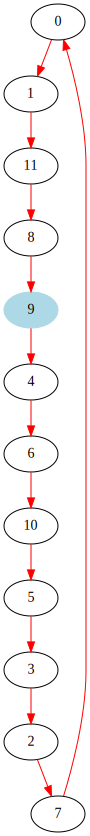

In [160]:
#Funcion Main

modelo_grafo = True                             #False para mostrar Modelo Grafo 01, True para mostrar Modelo Grafo 02

_init_ = 9                                       #Nodo inicial de donde partir y a donde llegar

Visited_Node = FoundWay(G,_init_)                #Lista de Nodos Visitados

n = len(G)                                       #Tamaño del Grafo
Q = []

Order_Nodes = Orden(Visited_Node, nodo)          #Lista de nodos ordenados

#Prueba
print(Visited_Node)
print(Order_Nodes)
#Fin Prueba

#Modelo Grafo 01 - Grafo Original
if not modelo_grafo:
    dot = Graph(comment = "Grafo 01")

    for u in range(n):
        q = []
        for v in G[u]:
            if u == 0:
                q.append(v)
                dot.edge(str(u), str(v))
            if u > 0:
                if v in Q[u-1]:
                    q.append(v)
                    dot.edge(str(u), str(v)) 
        Q.append(q)
    print("Grafo 1")
    
#Modelo Grafo 02 - Grafo solo con el recorrido
else:
    dot = Digraph(comment = "Grafo 01")  

    for u in range(n):
        v = Order_Nodes[u]
        dot.edge(str(u),str(v),color="red")
    print("Grafo 2")

#Colorea Nodo Inicial    
dot.node(str(_init_),str(_init_),color="lightblue", style='filled')    

#En prueba, descarga Grafo en Formato PDF
_download = True
if _download == True:
    file = "Grafo de " + str(n) + " nodos"
    dot.view(filename=file)
#Fin Sector de Prueba

graphviz.Source(dot)

[2, 3, 0, 1, 4, 2]
[1, 4, 3, 0, 2]


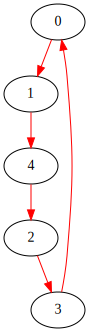

In [71]:
dot2 = Digraph(comment = "Grafo 01")

print(Rest)
print(Temp)  

for u in range(n):
    v = Temp[u]
    dot2.edge(str(u),str(v),color="red")
        
graphviz.Source(dot2)

0 	<--- paso  1
1 	<--- paso  2
3 	<--- paso  3
2 	<--- paso  4
4 	<--- paso  5
0 	<--- paso  6


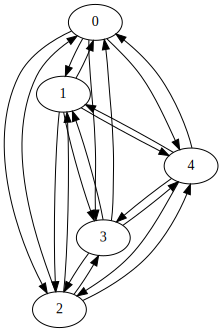

In [11]:
import graphviz
from graphviz import Digraph
from graphviz import Graph

G = GeneraGrafo(5)
FoundWay(G,0)

dot = Digraph(comment = "Grafo 01")
for u in range(len(G)):
    dot.node(str(u), str(u))
for u in range(len(G)):
    for v in G[u]:
        dot.edge(str(u), str(v))
        
"""dot2 = Graph(comment = "Grafo 01")
for u in range(len(G)):
    dot2.node(str(u), str(u))
for u in range(len(G)):
    for v in G[u]:
        dot2.edge(str(u), str(v))
#Descarga el grafo en pdf
#===========================
#dot.view()
#==========================="""


graphviz.Source(dot)
#dot2.view()



In [4]:
import graphviz
from graphviz import Digraph

def Graficar(G):
    dot = Digraph(comment = "Grafo 01")
    for u in range(len(G)):
        dot.node(str(u), str(u))
    for u in range(len(G)):
        for v in G[u]:
            dot.edge(str(u), str(v))
    return dot
    #graphviz.Source(dot)

In [162]:
import random
myList = [2, 109, False, 10, "Lorem", 482, "Ipsum"]
random.choice(myList)

10

In [165]:
import random
random.random() * 100

7.595792951260116